# **Projeto 1** : Analisando Vinhos

## **Objetivo**: Familiarização com a linguagem Python e com as bibliotecas Numpy, Sklearn, Pandas, Matplotlib, etc.

### Datasets disponíveis em: https://archive.ics.uci.edu/dataset/186/wine+quality

In [61]:
# Importar bibliotecas
from google.colab import drive
from google.colab import files
import pandas as pd
import os

# Definindo o caminho raiz do Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# Definindo o caminho padrão para a pasta contendo os arquivos
# Caso dê erro neste ponto, por gentileza, me informar, para que eu possa compartilhar corretamente a pasta.
# Eu tento deixar meu drive o mais organizado possível, com cada arquivo em sua determinada pasta correta.
BASE_DIR = '/content/drive/MyDrive/ITA - Pessoal/8º Semestre/ET-287/Projetos/Projeto 1'
os.chdir(BASE_DIR)
os.listdir(BASE_DIR)

['Project1_Ulisses_Lopes_da_Silva.ipynb',
 'winequality-red.csv',
 'winequality-white.csv',
 'wine.csv']

In [63]:
#lendo o arquivo do vinho tinto e separando as colunas por ";"
wine_red = pd.read_csv('winequality-red.csv', sep=';')

#lendo o arquivo do vinho branco, separando as colunas por ';', pulando a 1°linha, sem cabeçalho e seguindo o empilhamento do arquivo do vinho tinto
wine_white = pd.read_csv('winequality-white.csv',
                         sep=';',
                         skiprows=1,
                         header=None,
                         names=wine_red.columns
)

#concatenando os dois arquivos em uma única planilha
wine = pd.concat([wine_red, wine_white], ignore_index=True)

#convertendo o único arquivo dos dados em csv
wine.to_csv('wine.csv', index=False)

print('A dimensão do arquivo único é: ', wine.shape)


A dimensão do arquivo único é:  (6497, 12)


**A dimensão final "correta" é (6497, 12)**. Porém tomei a liberdade de adicionar uma coluna a mais ao dataframe (coluna **`type`**), que diz se os dados da linha vêm de "red" ou de "white". Dessa forma, as informações das linhas ficam melhor rastreáveis. Devido a esse acréscimo, a nova dimensão ficou (6497, 13).

In [64]:
#baixando o arquivo localmente
files.download('wine.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Desenvolvimento e Questões**


## 1. Baixar a base de dados disponível no repositório da **UCI machine learning** e gerar uma única planilha para os dados de vinho branco e tinto.

In [65]:
# Atividade já executada nos passos anteriores

## 2. Visualize a dimensão da matriz de dados e do vetor de rótulos.

In [66]:
# Dimensão da nova matriz de 'wine.csv'
print(wine.shape)

#Listagem dos rótulos do dataframe
print(wine['quality'].shape)

#Listagem das colunas
list(wine.columns)

(6497, 12)
(6497,)


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

## 3. Realize uma análise criteriosa dos dados da base de dados. Pontos que devem ser considerados:
   ### i. A base de dados é consistente?  
   R.: Sim, é consistente.
   ### ii. Há dados faltantes?
   R.: Não, não há dados faltantes.
   ### iii. Há dados não numéricos?  
   R.: Não, não há dados não-numéricos.
   ### iv. A base de dados é balanceada (considere as classes vinho tinto e branco)?
   R.: Não é tão balanceada. Há apenas 1599 exemplos de vinho tinto, enquanto há 4898 exemplos de vinho branco, ou seja, cerca de 25% do dataset é de vinho tinto, enquanto os outros 75%, de vinho branco.

   *Sugestão: leia o artigo*  
   *Modeling wine preferences by data mining from physicochemical properties*.  
   *Cortez et al., 2009.*

In [67]:
# Mostrando as primeiras linhas do arquivo
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [68]:
# Listando algumas estatísticas básicas do dataframe
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [69]:
# Verificando se há dados faltantes. Se o resultado for nulo, não há dados faltantes.
wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [70]:
# Verificando se há dados não numéricos. Se diferir de int, float, etc., há dados não numéricos.
wine.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [71]:
# Ou ainda:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


## 4. Apresente uma análise estatística dos dados que embase quais variáveis de entrada são mais relevantes se quisermos classificar o vinho pelo tipo (tinto vs. branco). Justifique.


In [72]:
# Acrescentando aos dataframes wine_red e wine_white uma coluna 'type', para melhor rastrear as linhas
wine_red['type'] = 'red'
wine_white['type'] = 'white'
wine = pd.concat([wine_red, wine_white], ignore_index=True)

# Número de exemplos para cada tipo de vinho
wine['type'].value_counts()

,count
type,
white,4898
red,1599


In [73]:
# Verificando as variáveis mais relevantes para cada um por meio de análise estatística - medida de ref.: MÉDIA
wine.groupby('type').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909


Podemos notar que algumas variáveis diferem sensivelmente entre si, quando estamos tratando de vinho tinto ou branco. Logo, para um possível trabalho de classificação, estas seriam as mais relevantes:

- fixed acidity;
- residual sugar
- free sulfur dioxide
- total sulfur dioxide

Outras secundárias possíveis:

- volatile acidity
- citric acid
- pH
- sulphatos

In [74]:
# Verificando as variáveis mais relevantes para cada um por meio de análise estatística - medida de ref.: STD
wine.groupby('type').std()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
white,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639


Novamente, escolhendo desta vez o desvio padrão (std), as variáveis que se destacam para uma possível tarefa de classificação se repetem.

## 5. Escolha duas das variáveis de entrada e faça um gráfico de dispersão para visualizar a distribuição dos dados de cada classe de vinho. Justifique sua escolha.


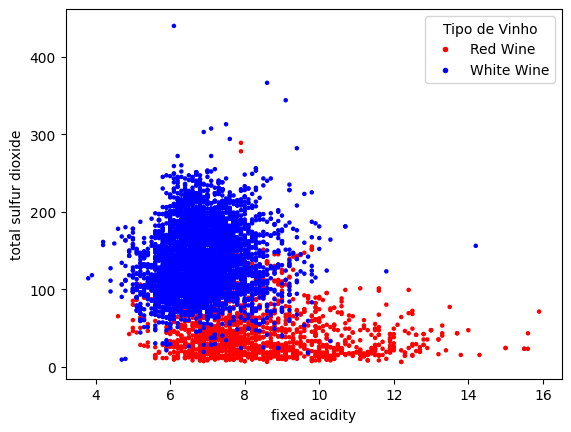

In [77]:
# Usaremos as variáveis "fixed acidity" e "total sulfur dioxide", pois estas figuram entre as que se destacaram para classificação na questão 4.
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.scatter(wine['fixed acidity'], wine['total sulfur dioxide'], s=5, c=wine['type'].map({'red':'r','white':'b'}))

plt.xlabel('fixed acidity')
plt.ylabel('total sulfur dioxide')

# Legenda
custom = [
    Line2D([0], [0], marker='o', color='w', label='Red Wine',   markerfacecolor='r', markersize=5),
    Line2D([0], [0], marker='o', color='w', label='White Wine', markerfacecolor='b', markersize=5)
]
plt.legend(handles=custom, title='Tipo de Vinho', loc='upper right')

plt.show()



## 6. Considerando agora a variável de qualidade do vinho, avalie como é a prevalência nas duas classes para os vinhos mais bem avaliados (**nota > 7**) e para os avaliados com **nota < 3**.

In [87]:
# Filtrando o dataset de acordo com a qualidade do vinho
high_quality = wine[wine['quality'] > 7]
low_quality  = wine[wine['quality'] < 3]

# Obtendo a proporção do vinho dessa determinada qualidade
print("High-Quality Wine: ", high_quality['type'].value_counts(), '\n\n')
print("Low-Quality Wine:  ", low_quality['type'].value_counts(), '\n\n')


High-Quality Wine:  type
white    180
red       18
Name: count, dtype: int64 


Low-Quality Wine:   Series([], Name: count, dtype: int64) 




Portanto, temos:

Vinhos de Alta Qualidade:
- Tinto: 18
- Branco: 180

Vinhos de Baixa Qualidade:
- Tinto: não há
- Branco: não há